# 参考资料
- Source https://github.com/networkx/networkx
- Website https://networkx.org/
- https://networkx.org/nx-guides/

In [ ]:
pip install networkx

In [6]:
import networkx as nx

nx.__version__

'3.1'

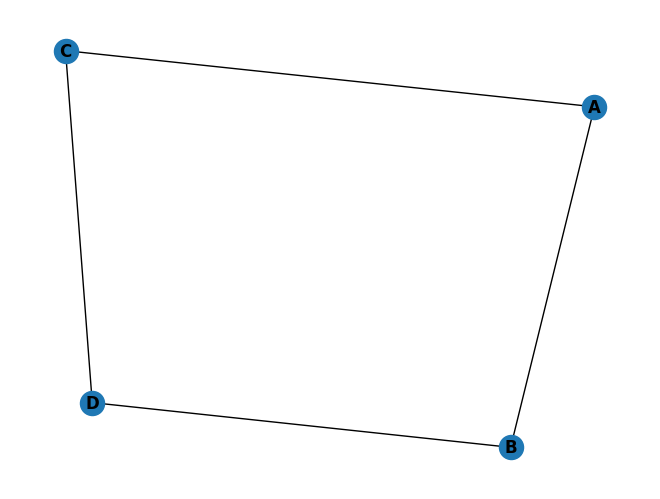

In [26]:
import networkx as nx
G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("B", "D", weight=2)
G.add_edge("A", "C", weight=1)
G.add_edge("C", "D", weight=4)
nx.shortest_path(G, "A", "D", weight="weight")
nx.draw(G, with_labels=True, font_weight='bold')

# Tutorial

## Creating a graph

In [55]:
# Create an empty graph with no nodes and no edges
import networkx as nx
G = nx.Graph()

## Nodes and Edges

G.number_of_nodes()=8
G.number_of_edges()=3


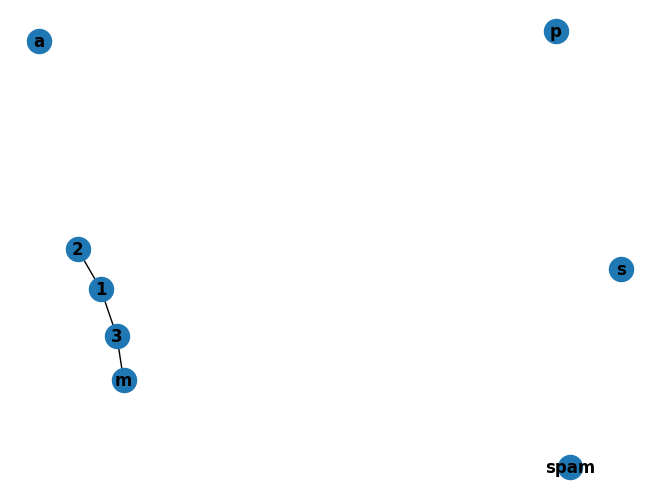

In [55]:
# Nodes
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

# Edges
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e) # unpack edge tuple*
G.add_edges_from([(1,2), (1,3)])
G.add_edges_from(H.edges)

G.clear()

G.add_edges_from([(1,2), (1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam") # adds node 'spam'
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

print(f"{G.number_of_nodes()=}")
print(f"{G.number_of_edges()=}")

nx.draw(G, with_labels=True, font_weight='bold')

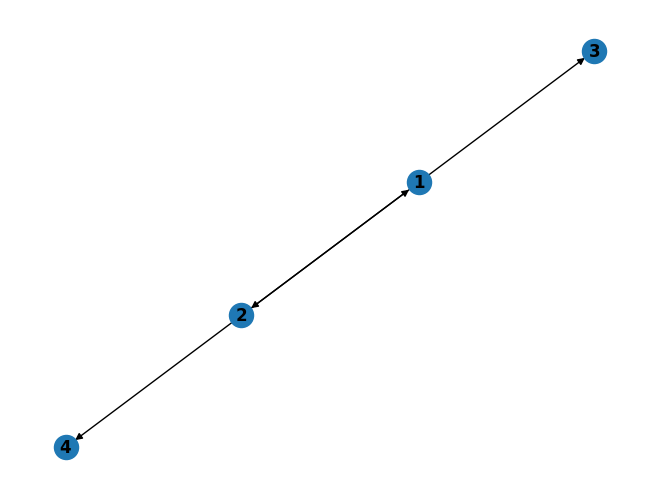

In [64]:
DG = nx.DiGraph()
DG.add_edge(2,1) # adds the nodes in order 2,1
DG.add_edge(1,3)
DG.add_edge(2,4)
DG.add_edge(1,2)

assert list(DG.successors(2)) == [1,4]
assert list(DG.edges) == [(2,1),(2,4),(1,3),(1,2)]
nx.draw(DG, with_labels=True, font_weight='bold')

## Examing elements of a graph

In [52]:
print(f"{list(G.nodes)=}")
print(f"{list(G.edges)=}")
print(f"{list(G.adj['m'])=}, {list(G.neighbors('m'))=}") # adj or neighbors
print(f"{G.degree['spam']=}") # the number of edeges incident to 'spam'
print(f"{list(G.degree)=}")

list(G.nodes)=[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
list(G.edges)=[(1, 2), (1, 3), (3, 'm')]
list(G.adj['m'])=[3], list(G.neighbors('m'))=[3]
G.degree['spam']=0
list(G.degree)=[(1, 2), (2, 1), (3, 2), ('spam', 0), ('s', 0), ('p', 0), ('a', 0), ('m', 1)]


## Removing elements from a graph

In [56]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

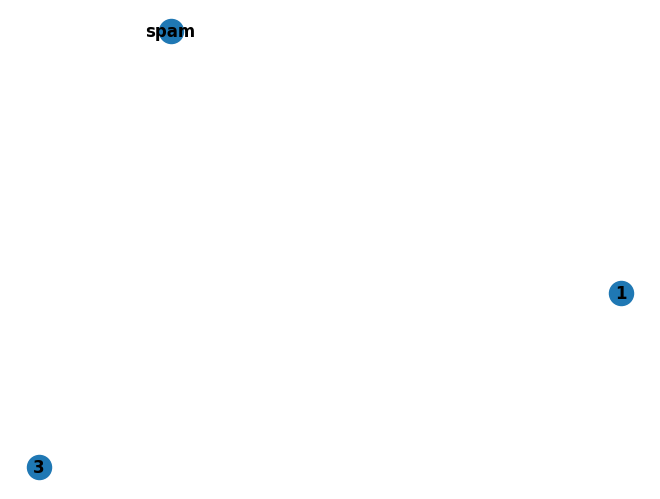

In [57]:
G.remove_edge(1, 3)
nx.draw(G, with_labels=True, font_weight='bold')

## Using the graph constructors

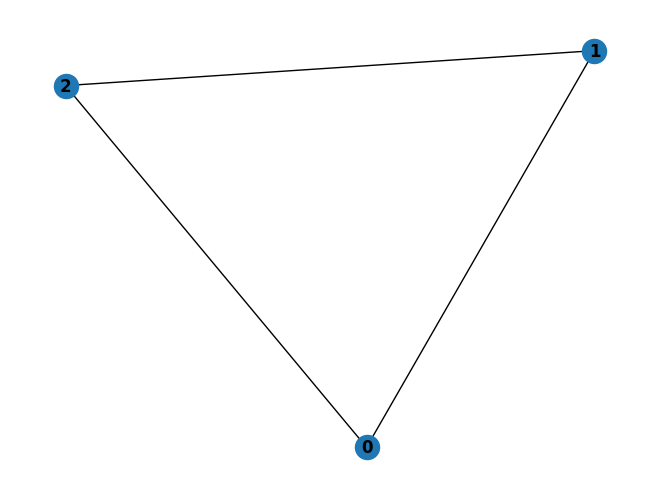

In [63]:
G.add_edge(1,2)
H = nx.DiGraph(G) # create a DiGraph using the connections from G
list(H.edges)
# nx.draw(H, with_labels=True, font_weight='bold')

edgelist = [(0,1), (1,2), (2,3)]
H = nx.Graph(edgelist) # create a graph from an edge list
list(H.edges)

adjacency_dict = {0:(1,2), 1:(0,2), 2:(0,1)}
H = nx.Graph(adjacency_dict) # create a Graph dict mapping nodes to nbrs
list(H.edges())

nx.draw(H, with_labels=True, font_weight='bold')

## What to use as nodes and edges

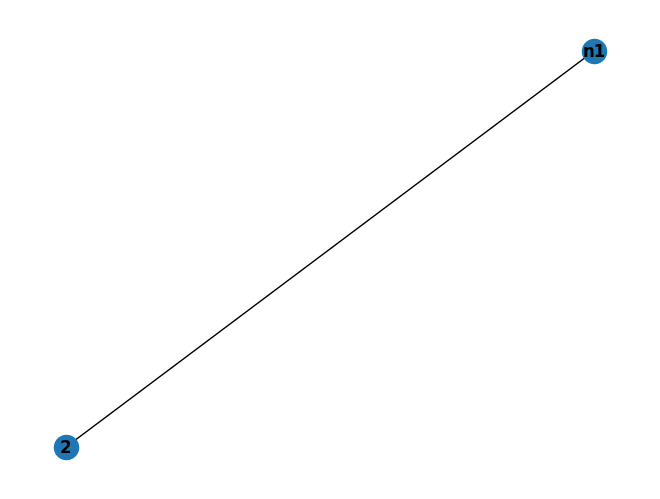

In [68]:
G = nx.Graph()

n1='n1'
n2=2

x = {
    'src': n1,
    'dst': n2,
    'remark': 'src->dst'
}
G.add_edge(n1, n2, object=x)
nx.draw(G, with_labels=True, font_weight='bold')

## Accessing edges and neighbors

In [80]:
G = nx.Graph([(1,2,{"color": "yellow"})])
G[1] # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [81]:
G[1][2]

{'color': 'yellow'}

In [82]:
G.edges[1,2]

{'color': 'yellow'}

In [78]:
G.add_edge(1,3)
G[1][3]['color'] = 'blue'
G.edges[1,2]['color'] = 'red'
G.edges[1,2]

{'color': 'red'}

In [83]:
FG = nx.Graph()
FG.add_weighted_edges_from([
    (1,2,0.125),
    (1,3,0.75),
    (2,4,1.2),
    (3,4,0.375)
])

for n,nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt<0.5: print(f"({n},{nbr},{wt:.3})")

(1,2,0.125)
(2,1,0.125)
(3,4,0.375)
(4,3,0.375)


In [84]:
for (u,v,wt) in FG.edges.data('weight'):
    if wt<0.5: print(f"({u},{v},{wt:.3})")

(1,2,0.125)
(3,4,0.375)


## Adding attributes to graphs, nodes, and edges

### Graph attributes

In [85]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [86]:
G.graph['day']='Monday'
G.graph

{'day': 'Monday'}

### Node attributes

In [87]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [88]:
G.nodes[1]['room']=714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

### Edge attributes

In [91]:
G.add_edge(1,2,weight=4.7)
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color': 'blue'}), (2,3, {'weight': 8})])
G[1][2]['weight']=4.7
G.edges[3,4]['weight']=4.2

## Directed graphs

In [96]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
DG.out_degree(1, weight='weight')

0.5

In [97]:
DG.degree(1, weight='weight')

1.25

In [98]:
list(DG.successors(1))

[2]

In [99]:
list(DG.neighbors(1))

[2]

## Multigraphs

In [100]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([
    (1,2,0.5),
    (1,2,0.75),
    (2,3,0.5)
])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

[1, 2, 3]

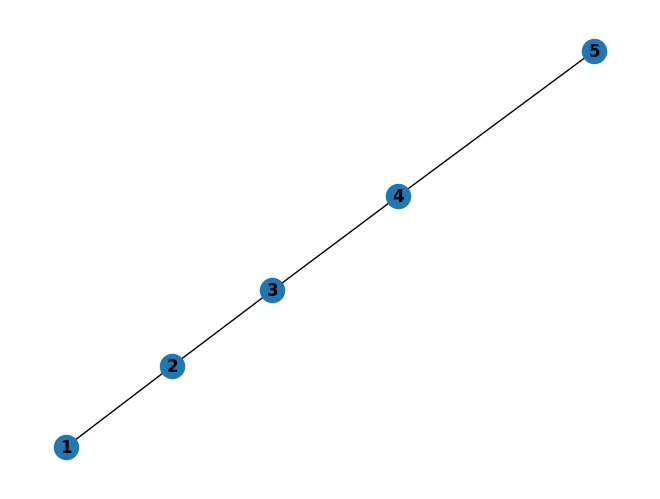

In [104]:
GG = nx.Graph()
for n,nbrs in MG.adjacency():
    for nbr,edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight=minvalue)

nx.draw(G, with_labels=True, font_weight='bold')
nx.shortest_path(GG,1,3)

## Graph generators and graph operations

### Using a (constructive) generator for a classic graph

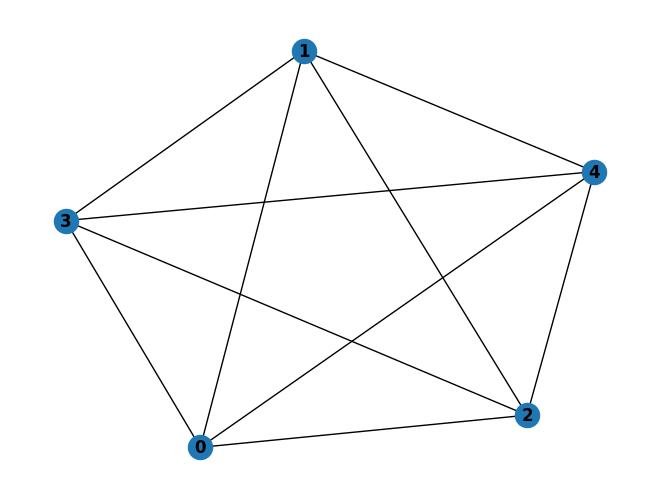

In [106]:
K_5 = nx.complete_graph(5)
nx.draw(K_5, with_labels=True, font_weight='bold')

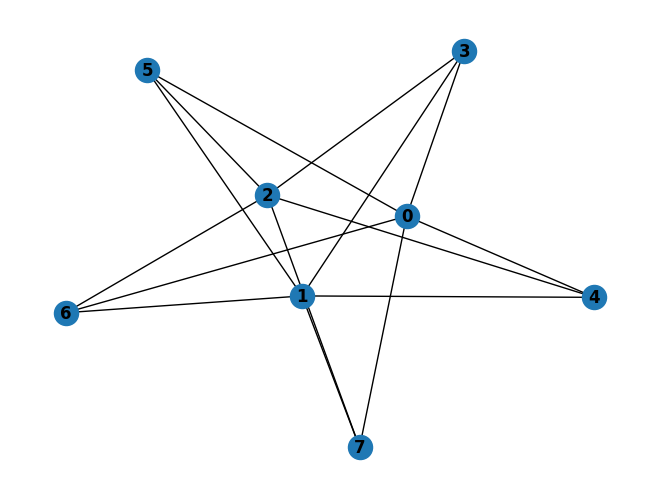

In [108]:
K_3_5 = nx.complete_bipartite_graph(3,5)
nx.draw(K_3_5, with_labels=True, font_weight='bold')

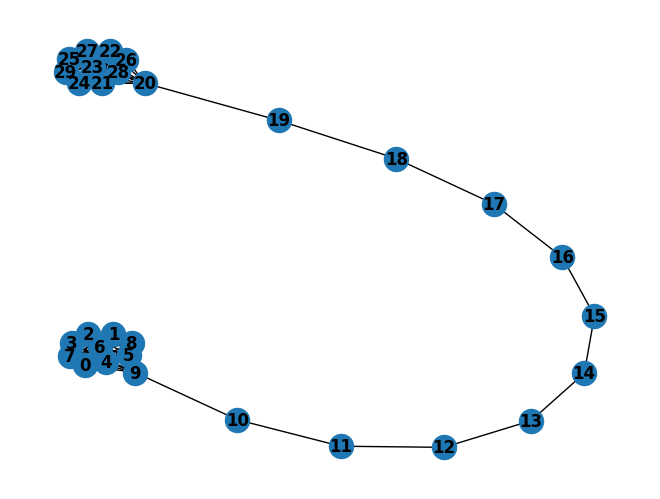

In [109]:
barbell = nx.barbell_graph(10, 10)
nx.draw(barbell, with_labels=True, font_weight='bold')

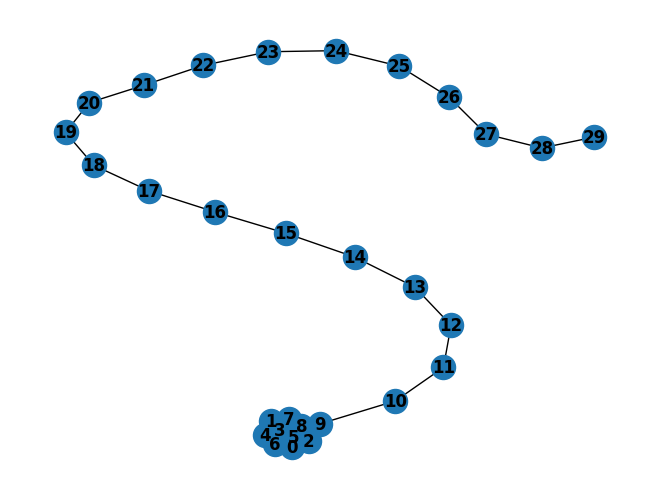

In [110]:
lollipop = nx.lollipop_graph(10, 20)
nx.draw(lollipop, with_labels=True, font_weight='bold')

## Analyzing graphs

[{1, 2, 3}, {'spam'}]

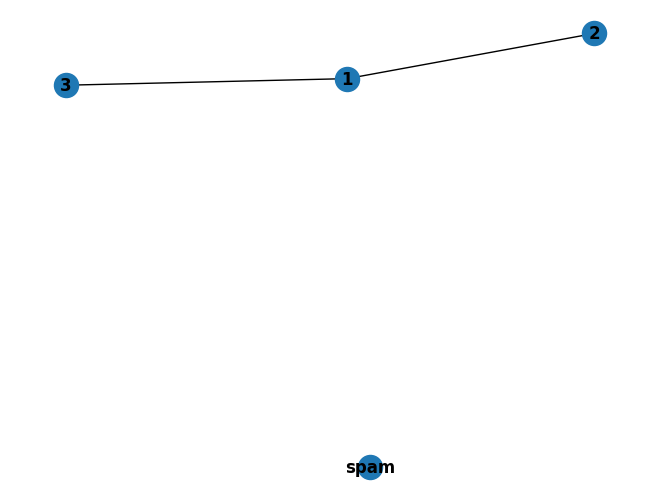

In [113]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3)])
G.add_node("spam")

nx.draw(G, with_labels=True, font_weight='bold')
list(nx.connected_components(G))

In [114]:
sorted(d for n,d in G.degree())

[0, 1, 1, 2]

In [115]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [118]:
sp = dict(nx.all_pairs_shortest_path(G))
sp

{1: {1: [1], 2: [1, 2], 3: [1, 3]},
 2: {2: [2], 1: [2, 1], 3: [2, 1, 3]},
 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]},
 'spam': {'spam': ['spam']}}

In [120]:
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

## Drawing graphs

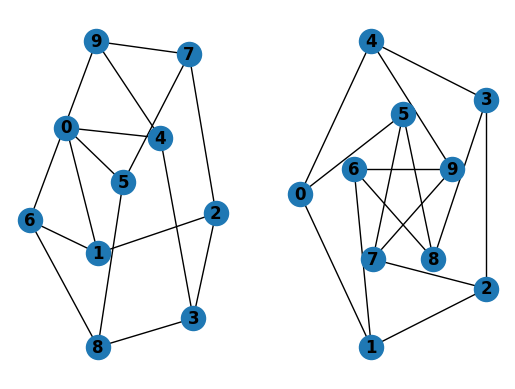

In [123]:
import matplotlib.pyplot as plt

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5,10), range(5)], with_labels=True, font_weight='bold')

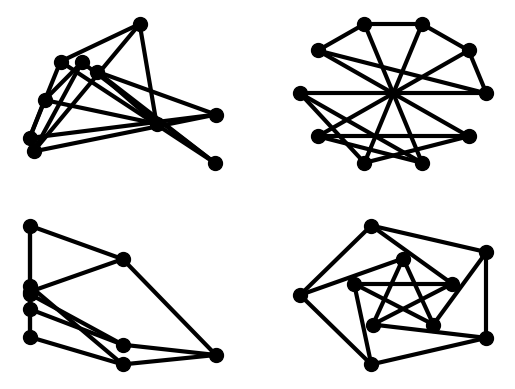

In [127]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3
}

subax1=plt.subplot(221)
nx.draw_random(G, **options)

subax2=plt.subplot(222)
nx.draw_circular(G, **options)

subax3=plt.subplot(223)
nx.draw_spectral(G, **options)

subax4=plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10),range(5)], **options)

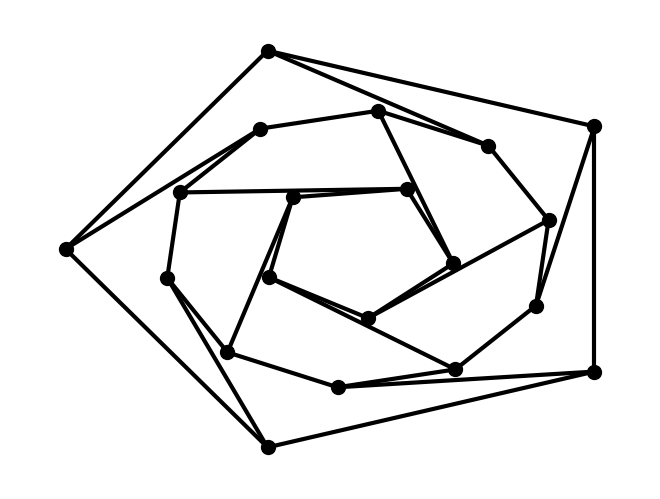

In [128]:
G = nx.dodecahedral_graph()
shells = [[2,3,4,5,6], [8,1,0,19,18, 17,16,15,14,7],[9,10,11,12,13]]
nx.draw_shell(G, nlist=shells, **options)

### save drawings to a file

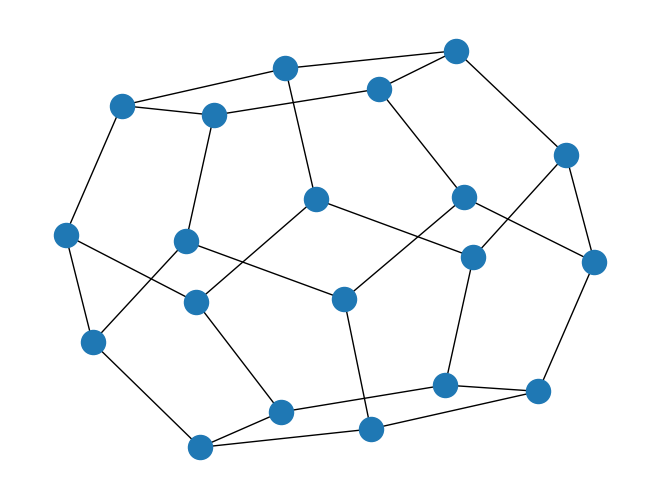

In [132]:
nx.draw(G)
plt.savefig("data/networkx_savefig.png")